## EE 502 P: Analytical Methods for Electrical Engineering
    
# Homework 5: Differential Equations

## Due November 14, 2021 by 11:59 PM
### <span style="color: red">Mayank Kumar</span>

Copyright &copy; 2021, University of Washington

<hr>

**Instructions**: Please use this notebook as a template. Answer all questions using well formatted Markdown with embedded LaTeX equations, executable Jupyter cells, or both. Submit your homework solutions as an `.ipynb` file via Canvas.

<span style="color: red'">
Although you may discuss the homework with others, you must turn in your own, original work.
</span>

**Things to remember:**
- Use complete sentences. Equations should appear in text as grammatical elements.
- Comment your code.
- Label your axes. Title your plots. Use legends where appropriate. 
- Before submitting a notebook, choose Kernel -> Restart and Run All to make sure your notebook runs when the cells are evaluated in order. 

### 0. Warmup (Do not turn in)

- Make sure you download, read, and run the notebook for lecture 6. Work through the notebook cell by cell and see what happens when you change the expressions, and make up some of your own.
- The material covered in class is intended to be an introductory subset the general subject of differential equations. To get the full story, an indispensable book is the one by Hirsch and Smale: https://www.amazon.com/Differential-Equations-Dynamical-Systems-Introduction/dp/0123820103
- The material covered here in particular comes from the beginnings of Chapters 1, 2, 3, 3, 6, 12, and 14.

In [1]:
import math
import scipy # Has linear algebra
import scipy.ndimage
import scipy.integrate as spi
import numpy as np
import sympy as sm
sm.init_printing(use_latex='mathjax')
import matplotlib.pyplot as plt
import matplotlib.patches as pch
%matplotlib inline
import warnings

### 1. Taylor Approxmations

Use `sympy` to find the Taylor Approximations to $\sin x$ with 1 term, 2 terms, 3 terms, all the way up to 6 terms.
Ignore the remainder term. Plot all of these approximations along with $\sin x$ on the same plot, showing the 
approximations get better and better. 

___
### Answer to Question 1 

One term in taylor series approximation of sin (x) is: 


x

Two term in taylor series approximation of sin (x) is: 


   3    
  x     
- ── + x
  6     

Three term in taylor series approximation of sin (x) is: 


  5    3    
 x    x     
─── - ── + x
120   6     

Four term in taylor series approximation of sin (x) is: 


    7      5    3    
   x      x    x     
- ──── + ─── - ── + x
  5040   120   6     

Five term in taylor series approximation of sin (x) is: 


   9       7      5    3    
  x       x      x    x     
────── - ──── + ─── - ── + x
362880   5040   120   6     

Six term in taylor series approximation of sin (x) is: 


     11         9       7      5    3    
    x          x       x      x    x     
- ──────── + ────── - ──── + ─── - ── + x
  39916800   362880   5040   120   6     

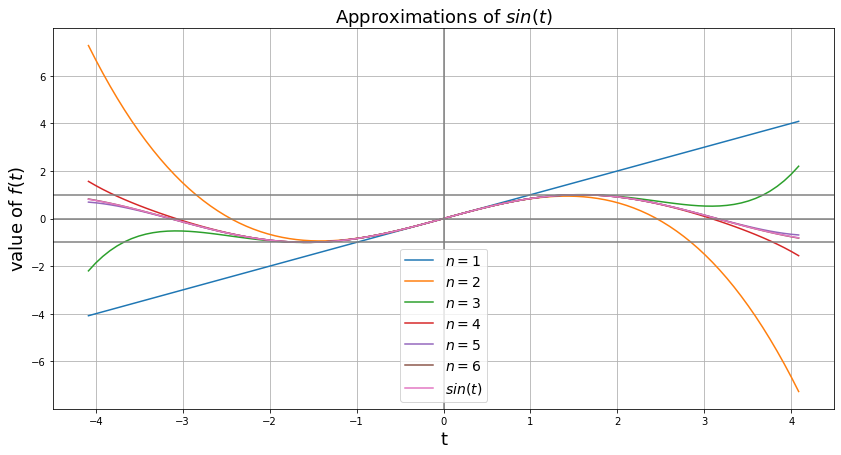

In [2]:
from sympy import Symbol, sin, series
from sympy import * 
x = Symbol('x')

## first term 
print("One term in taylor series approximation of sin (x) is: ")
func1 = series(sin(x),x, n=2).removeO()
display(func1)
func1 = lambdify(x, func1, modules=['numpy'])

## Second term 
print("Two term in taylor series approximation of sin (x) is: ")
func2 = series(sin(x),x, n=4).removeO()
display(func2)
func2 = lambdify(x, func2, modules=['numpy'])

## Third term
print("Three term in taylor series approximation of sin (x) is: ")
func3 = series(sin(x),x, n=6).removeO()
display(func3)
func3 = lambdify(x, func3, modules=['numpy'])

## Fourth term
print("Four term in taylor series approximation of sin (x) is: ")
func4 = series(sin(x),x, n=8).removeO()
display(func4)
func4 = lambdify(x, func4, modules=['numpy'])

## Fifth term 
print("Five term in taylor series approximation of sin (x) is: ")
func5 = series(sin(x),x, n=10).removeO()
display(func5)
func5 = lambdify(x, func5, modules=['numpy'])

## Sixth term
print("Six term in taylor series approximation of sin (x) is: ")
func6 = series(sin(x),x, n=12).removeO()
display(func6)
func6 = lambdify(x, func6, modules=['numpy'])

## Sin general approximation
func7 = sm.sin(x)
func7 = lambdify(x, func7, modules=['numpy'])
n = 1.3
#### Ploting the functions: One approximation at a time. 
t = np.linspace(-np.pi*n,np.pi*n,100)

# plt.plot(sm.exp(-sm.sin(y)))
fig = plt.figure(figsize=(14,7))
plt.plot(t, func1(t), label = '$n = 1$')
plt.plot(t, func2(t), label = '$n = 2$')
plt.plot(t, func3(t), label = '$n = 3$')
plt.plot(t, func4(t), label = '$n = 4$')
plt.plot(t, func5(t), label = '$n = 5$')
plt.plot(t, func6(t), label = '$n = 6$')
plt.plot(t, func7(t), label = '$sin(t)$')
plt.axhline(y=0,  color='gray',linestyle='-')
plt.axvline(x=0, color='gray', linestyle='-')
plt.axhline(y=1, color='gray', linestyle='-')
plt.axhline(y=-1, color='gray', linestyle='-')
plt.xlabel('t', size = 18)
plt.ylabel('value of $f(t)$', size = 18)
plt.title('Approximations of $sin(t)$', size =18)
plt.grid()
plt.legend(prop={'size': 14} )

### 2. Showing Inequalities With Taylor's Approximation.

Show that if $x>0$ then $1 + \frac{1}{2}x - \frac{1}{8}x^2 \leq \sqrt{1+x} \leq 1 + \frac{1}{2}x$. 

Hint: break this into two steps, one for each inequality. For the first step, use the first three terms of the Taylor approximation and a residual term that is cubic. For the second inequality, use the first two terms of the Taylor approximation and a residual term that is a square. Make sure to explain each step of your argument.

How good is this approximation for $\sqrt{2}$? How about $\sqrt{3}$? 

Visualize this problem by making a plot showing the relationship of the three expressions as $x$ increases.

___
### Answer to Question 2

Let visualize this inequality in 2 steps. 
First being: 
$$ 1 + \frac{x}{2} - \frac{x^2}{8} \leq \sqrt{1+x}   \;\;\;\;\;\;... (1) $$
and Second : 
$$\sqrt{1+x} \leq 1 + \frac{x}{2}\;\;\;\;\;\;... (2)$$

In [3]:
x = symbols("x")
exp = sm.sqrt(1+x)
print("Expression to compare with LHS = ")
display(series(exp , n=3))
print("Expression to compare with RHS = ")
display(series(exp , n=2))

Expression to compare with LHS = 


         2        
    x   x     ⎛ 3⎞
1 + ─ - ── + O⎝x ⎠
    2   8         

Expression to compare with RHS = 


    x    ⎛ 2⎞
1 + ─ + O⎝x ⎠
    2        

for equation (1), we need three terms in approximation of $\sqrt{1+x}$ to compare with equation on the left hand side. if we take reference of above expansion we have, 
$$ 1 + \frac{x}{2} - \frac{x^2}{8} \leq \sqrt{1+x}  = \displaystyle 1 + \frac{x}{2} - \frac{x^{2}}{8} + O\left(x^{3}\right)\;\;\;\;\;\;... (3) $$

for $ x > 0 $, if we prove that $O(x^{3})\geq 0 $ then $ LHS \leq RHS $ will be true.

Remainder will be $$ \left|R_n\right| \leq f^{n+1}(z)  \frac{ x^{n+1}}{(n+1)!}\text{, where $f^{n+1}$ is $(n+1)^{th}$ derivative of} f$$

with $ 0 < z < x $, x is the where we are calculating the error term.

Therefore, $$ \left|R_3\right| = \left|O(x^3)\right| \leq\left|f^{4}(z)  \frac{ x^{4}}{(4)!}\right|$$\
$$ \left|R_3\right| = \left|O(x^3)\right| \leq\left| \frac{-15}{16(z+1)^{\frac{7}{2}}}  \frac{ x^{4}}{(4)!}\right|$$\
$$ \left|R_3\right| = \left|O(x^3)\right| \leq \left|\frac{-15 x^{4}}{384 (z+1)^{\frac{7}{2}}} \right|$$

For $0<z<x$, min value of $R_3$ with happen at z =0 and max value of $R_3$ will happen at z = x. Therefore, 

$$\frac{15 x^4}{384(1+x)^{3.5}} \leq |R_3| \leq \frac{15 x^4}{384}$$
$$\frac{5 x^4}{128(1+x)^{3.5}} \leq |R_3| \leq \frac{5 x^4}{128}$$

For x > 0, $R_3$ will always be greater than equal to 0 as it has even power. therefore the inequality (1) is true.   

for equation (2), As $\sqrt{1+x} $ is differentiable over interval $(0,x)$.

if we apply mean value theorm on interval $(0,x)$ on the function $f(x) = \sqrt{1+x}$, we will have,

$$\frac{f(x) - f(0)}{x-0} = f'(c)$$\
$$\frac{f(x) - f(0)}{x-0} = f'(c) = \frac{1}{2\sqrt{1+c}}$$

$f'(c)$ will have maximum value when denominator is minimum. which get us to c = 0,

$$\frac{f(x) - f(0)}{x-0} \leq \frac{1}{2}$$\
$$\frac{\sqrt{1+x} - 1}{x} \leq \frac{1}{2}$$\
$$\sqrt{1+x} -1 \leq \frac{x}{2}$$\
$$\sqrt{1+x} \leq 1 + \frac{x}{2}$$






 Error increases with increase in value of x.


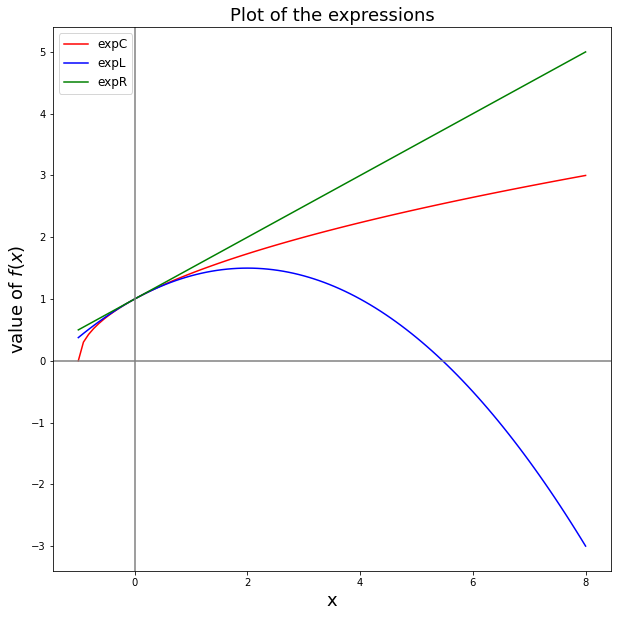

In [4]:
### Plotting all the three expressions 
x = symbols('x')
expC = lambdify(x, exp, modules = ['numpy'])
expL = lambdify(x, 1 + x/2 -(x**2)/8, modules = ['numpy'])
expR = lambdify(x,1 + x/2, modules = ['numpy'])

x = np.linspace(-1, 8, 100)

fig = plt.figure(figsize = (10,10))
plt.plot(x,expC(x), color = 'r', label = 'expC')
plt.plot(x,expL(x), color = 'b',label = 'expL')
plt.plot(x,expR(x), color = 'g', label = 'expR')
plt.axhline(y=0,  color='gray',linestyle='-')
plt.axvline(x=0, color='gray', linestyle='-')
plt.xlabel('x', size = 18)
plt.ylabel('value of $f(x)$', size = 18)
plt.title('Plot of the expressions', size =18)
plt.legend(prop={'size': 12} )
print("\033[1m", "Error increases with increase in value of x.")

In [5]:
## for sqrt (2) and sqrt(3)
x = 1  #for 2, x = 1 
LHS2 = expL(x)
actual2 = expC(x)
RHS2 = expR(x)

print("Square root of 2,",'\nas per LHS =', LHS2,'\nAs per MID =', actual2,'\nAs per RHS =', RHS2)

x = 2  #for 3, x = 2
LHS3 = expL(x)
actual3 = expC(x)
RHS3 = expR(x)
print("\nSquare root of 3,",'\nas per LHS =', LHS3,'\nAs per MID =', actual3,'\nAs per RHS =', RHS3)

Square root of 2, 
as per LHS = 1.375 
As per MID = 1.4142135623730951 
As per RHS = 1.5

Square root of 3, 
as per LHS = 1.5 
As per MID = 1.7320508075688772 
As per RHS = 2.0


### 3. Equilibria Points and Linearization

For each of the
following systems:
(i) find the equilibria, 
(ii) linearize the system around each equilibrium and find the eigenvalues, and
(iii) state whether the system is stable at each equilibrium.

$$
\mathrm{a)} \;\; 
\begin{pmatrix}
\dot x_1 \\
\dot x_2
\end{pmatrix} = 
\begin{pmatrix}
x_2^2 \\
x_1^2
\end{pmatrix}
$$

$$
\mathrm{b)} \;\; 
\begin{pmatrix}
\dot x_1 \\
\dot x_2
\end{pmatrix} = 
\begin{pmatrix}
x_1^2 + x_2^2 \\
x_2
\end{pmatrix}
$$

$$
\mathrm{c)} \;\; 
\begin{pmatrix}
\dot x_1 \\
\dot x_2
\end{pmatrix} = 
\begin{pmatrix}
\sin x_2 \\
\cos x_1
\end{pmatrix}
$$

___
### Question 3, part (a)
$$
\begin{pmatrix}
\dot x_1 \\
\dot x_2
\end{pmatrix} = 
\begin{pmatrix}
x_2^2 \\
x_1^2
\end{pmatrix}
$$

(i) For above system equilibrium point will be at $\dot x_1 = 0 \;\; \&\;\; \dot x_2 = 0$\
$\therefore \text{we have equilibrium at points, }$ $$ x_2  = 0, x_1 = 0 $$

(ii) To linearize the above system, we have to represent the system in form $\dot x = Ax$ and Hence, we have to calculate Jacobian.

\begin{align}
J & = \begin{pmatrix}
\frac{\partial {x_2}^{2}}{\partial x_1} & 
\frac{\partial {x_2}^{2}}{\partial x_2} \\
\frac{\partial {x_1}^{2}}{\partial x_1} & 
\frac{\partial {x_1}^{2}}{\partial x_2} \\
\end{pmatrix} \\
\; & = \begin{pmatrix}
0 & 2 x_2 \\
2 x_1 & 0
\end{pmatrix}.
\end{align}

At $x_1 = 0$ , $x_2 = 0$, \begin{align}A & = \begin{pmatrix}
0 & 0 \\
0 & 0
\end{pmatrix}.
\end{align}

above Matrix A has eigen value of,

In [6]:
a = sm.Matrix([
    [0,0],
    [0,0]
]).eigenvals()
print("Eigen Values are : ", a)
print("Both the eigen values of the system are 0, which makes it unstable at (0,0).")

Eigen Values are :  {0: 2}
Both the eigen values of the system are 0, which makes it unstable at (0,0).


___
### Question 3, part (b)
$$
\begin{pmatrix}
\dot x_1 \\
\dot x_2
\end{pmatrix} = 
\begin{pmatrix}
x_1^2 +x_2^2 \\
x_2^2
\end{pmatrix}
$$

(i) For above system equilibrium point will be at $\dot x_1 = 0 \;\; \&\;\; \dot x_2 = 0$\
$\Rightarrow \text{for equilibrium,}$ $$ x_2  = 0, x_1^2 + x_2^2 = 0 $$
$\therefore \text{we have equilibrium at points, }$ $$ x_2  = 0, x_1 = 0 $$

(ii) To linearize the above system, we have to represent the system in form $\dot x = Ax$ and Hence, we have to calculate Jacobian.

\begin{align}
J & = \begin{pmatrix}
\frac{\partial (x_1^2 + x_2^2)}{\partial x_1} & 
\frac{\partial (x_1^2 + x_2^2)}{\partial x_2} \\
\frac{\partial {x_2}^{2}}{\partial x_1} & 
\frac{\partial {x_2}^{2}}{\partial x_2} \\
\end{pmatrix} \\
\; & = \begin{pmatrix}
2 x_1 & 2 x_2 \\
0 & 1
\end{pmatrix}.
\end{align}

At $x_1 = 0$ , $x_2 = 0$, \begin{align}A & = \begin{pmatrix}
0 & 0 \\
0 & 1
\end{pmatrix}.
\end{align}

above Matrix A has eigen value of,

In [7]:
a = sm.Matrix([
    [0,0],
    [0,1]
]).eigenvals()
print("Eigen Values are : ", a)

print("""System has 2 eigen values. One of them is \"0\" and Other is \"1\".
For a system to be stable, both the eigen values should be negative. This system is not stable.
      """)

Eigen Values are :  {0: 1, 1: 1}
System has 2 eigen values. One of them is "0" and Other is "1".
For a system to be stable, both the eigen values should be negative. This system is not stable.
      


___
### Question 3, part (c)
$$
\begin{pmatrix}
\dot x_1 \\
\dot x_2
\end{pmatrix} = 
\begin{pmatrix}
\sin x_2 \\
\cos x_1
\end{pmatrix}
$$

(i) For above system equilibrium point will be at $\dot x_1 = 0 \;\; \&\;\; \dot x_2 = 0$\
$\Rightarrow \text{for equilibrium,}$ $$ \sin x_2  = 0, \cos x_1 = 0 $$
$\therefore \text{we have equilibrium at points, }$ $$ x_2  = 0, \pi, 2\pi...n\pi ; $$ $$x_1 = \frac{\pi}{2}, \frac{3\pi}{2},\frac{5\pi}{2}... \frac{(2n-1)\pi}{2}$$

(ii) To linearize the above system, we have to represent the system in form $\dot x = Ax$ and Hence, we have to calculate Jacobian.

\begin{align}
J & = \begin{pmatrix}
\frac{\partial \sin x_2}{\partial x_1} & 
\frac{\partial \sin x_2}{\partial x_2} \\
\frac{\partial \cos x_1}{\partial x_1} & 
\frac{\partial \cos x_1}{\partial x_2} \\
\end{pmatrix} \\
\; & = \begin{pmatrix}
0 & \cos x_2 \\
-\sin x_1 & 0
\end{pmatrix}.
\end{align}

At $x_1 = \frac{\pi}{2}$ , $x_2 = 0$, \begin{align}A & = \begin{pmatrix}
0 & 1 \\
-1 & 0
\end{pmatrix}.
\end{align}

At $x_1 = \frac{3\pi}{2}$ , $x_2 = π $, \begin{align}A & = \begin{pmatrix}
0 & -1 \\
1 & 0
\end{pmatrix}.
\end{align}

above Matrix A has eigen value of,

In [8]:
a = sm.Matrix([
    [0,1],
    [-1,0]
]).eigenvals()

print("Eigen Values are : ", a)

b = sm.Matrix([
    [0,-1],
    [1,0]
]).eigenvals()

print("Eigen Values are : ", b)

print("Both the eigen values of the system are imaginary, which makes it oscillatory at (π/2,0) and (3π/2,π).")

Eigen Values are :  {-I: 1, I: 1}
Eigen Values are :  {-I: 1, I: 1}
Both the eigen values of the system are imaginary, which makes it oscillatory at (π/2,0) and (3π/2,π).


___
### 4. Tuning Eigenvalues

Consider the matrix

$$
A = \begin{pmatrix}
  k & -k \\
  1 & k-1 \\
\end{pmatrix}
$$

and the system $\dot x = A x$. Plot the real part of the eigenvalues of $A$ as a function of $k$, for $k$ ranging from -2 to 2. 
For what values of $k$ is the system stable? 

Plot example phase portraits for $A$ when $k$ is in the stable range showing the range of behaviors you can get from tuning $k$. 

Eigen Values are : 


⎧      _________               _________       ⎫
⎪    ╲╱ 1 - 4⋅k    1         ╲╱ 1 - 4⋅k    1   ⎪
⎨k - ─────────── - ─: 1, k + ─────────── - ─: 1⎬
⎪         2        2              2        2   ⎪
⎩                                              ⎭

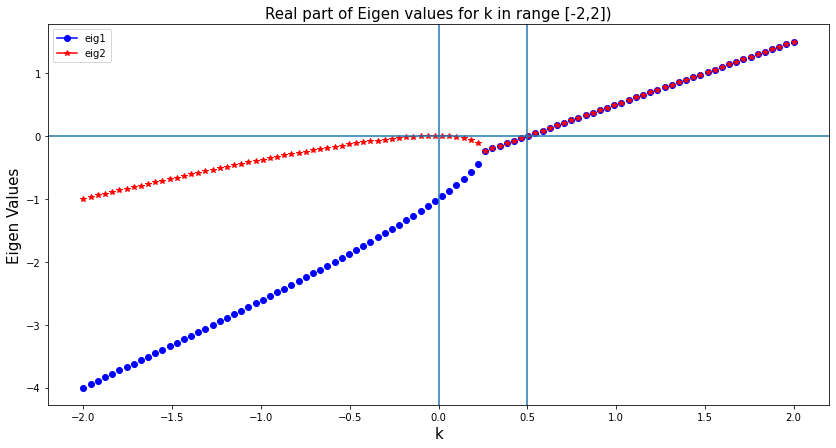

In [9]:
k = sm.symbols ("k")
A = sm.Matrix([
    [k,-k],
    [1,k-1]
])

print("Eigen Values are : ")
display(A.eigenvals())
eig1, eig2 = A.eigenvals()              #saving eigen value to 2 lists.
eig1 = lambdify(k,eig1)                 # converting to function as ploting is required.
eig2 = lambdify(k,eig2)                 # converting to function as ploting is required.
eig1_list = []
eig2_list = []

count = 0
x = np.linspace(-2,2,100)
fig = plt.figure(figsize = (14,7))

## saving the real part of eigen values in a list 
## this step is needed because otherwise negative number inside sqrt will throw error. 
for i in range(len(x)):
    eig1_list.append(eig1(complex(x[i].real)))
    eig2_list.append(eig2(complex(x[i].real)))
    
for i in range(len(x)):
    if count == 0:
        plt.plot(x[i],eig1_list[i].real, '-o', color = 'b',label = 'eig1')
        plt.plot(x[i],eig2_list[i].real, '-*', color = 'r', label = 'eig2')
        count += 1
    elif count >= 1 :
        plt.plot(x[i],eig1_list[i].real, '-o',color = 'b')
        plt.plot(x[i],eig2_list[i].real, '-*',color = 'r')
        
plt.title("Real part of Eigen values for k in range [-2,2])",  size = 15)
plt.xlabel('k', size = 15)
plt.ylabel('Eigen Values', size = 15)
plt.axhline(y= 0)
plt.axvline(x= 0)
plt.axvline(x= 0.5)
plt.legend()
plt.show()

Text(0.5, 1.0, '$K = 1$')

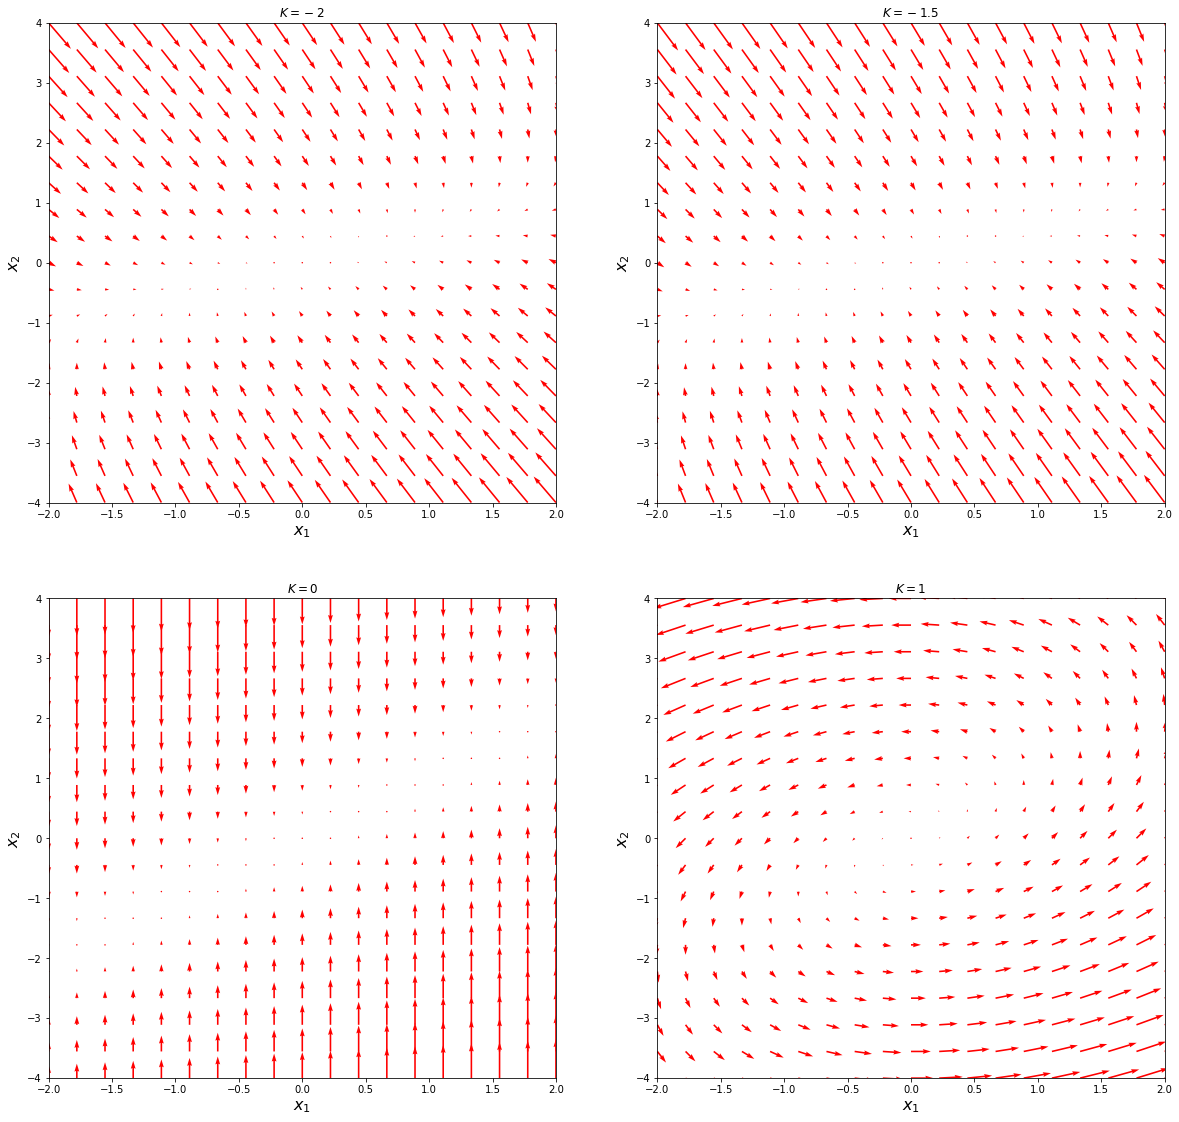

In [10]:
### function deaclartion
def f_vdp4(x, k): 
    return [
        k * x[0] - k * x[1],
        x[0] + (k-1)* x[1]
    ]

### Variable processing
a1,b1 = (-2,2)
a2,b2 = (-4,4)
x1 = np.linspace(a1, b1, 19)
x2 = np.linspace(a2, b2, 19)
X1,X2 = np.meshgrid(x1,x2)

fig = plt.figure(figsize = (20,30))
size = 16

### first value of K
u,v = np.zeros(X1.shape), np.zeros(X2.shape)
n,m = X1.shape
k = -2
for i in range(n):
    for j in range(m):
        xdot = f_vdp4([X1[i,j],X2[i,j]], k )
        u[i,j] = xdot[0]
        v[i,j] = xdot[1]
fig.add_subplot(321)
Q = plt.quiver(X1, X2, u, v, color='r')

plt.xlabel('$x_1$', size = size)
plt.ylabel('$x_2$', size = size)
plt.xlim([a1,b1])
plt.ylim([a2,b2])
plt.title("$K = -2$")

### Second value of K
u,v = np.zeros(X1.shape), np.zeros(X2.shape)
n,m = X1.shape
k = -1.5
for i in range(n):
    for j in range(m):
        xdot = f_vdp4([X1[i,j],X2[i,j]], k )
        u[i,j] = xdot[0]
        v[i,j] = xdot[1]
fig.add_subplot(322)
Q = plt.quiver(X1, X2, u, v, color='r')

plt.xlabel('$x_1$', size = size)
plt.ylabel('$x_2$', size = size)
plt.xlim([a1,b1])
plt.ylim([a2,b2])
plt.title("$K = -1.5$")

### Third value of K
u,v = np.zeros(X1.shape), np.zeros(X2.shape)
n,m = X1.shape
k = 0
for i in range(n):
    for j in range(m):
        xdot = f_vdp4([X1[i,j],X2[i,j]], k )
        u[i,j] = xdot[0]
        v[i,j] = xdot[1]
fig.add_subplot(323)
Q = plt.quiver(X1, X2, u, v, color='r')

plt.xlabel('$x_1$', size = size)
plt.ylabel('$x_2$', size = size)
plt.xlim([a1,b1])
plt.ylim([a2,b2])
plt.title("$K = 0$")

### Fourth value of K
u,v = np.zeros(X1.shape), np.zeros(X2.shape)
n,m = X1.shape
k = 1
for i in range(n):
    for j in range(m):
        xdot = f_vdp4([X1[i,j],X2[i,j]], k )
        u[i,j] = xdot[0]
        v[i,j] = xdot[1]
fig.add_subplot(324)
Q = plt.quiver(X1, X2, u, v, color='r')

plt.xlabel('$x_1$', size = size)
plt.ylabel('$x_2$', size = size)
plt.xlim([a1,b1])
plt.ylim([a2,b2])
plt.title("$K = 1$")

### 5. Rotations Again

Let $\dot x = Ax$

$$
A = \begin{pmatrix}
0 & -w_3 & w_2 \\
w_3 & 0 & -w_1 \\
-w_2 & w_1 & 0
\end{pmatrix}
$$

where $w_i \in \mathbb{R}$. 

a) Show that $A$ is **skew symmetric**, meaning that, that $A^T = -A$.

b) Show that all points of the form 

$$
x = a \begin{pmatrix}
w_1 \\
w_2 \\
w_3
\end{pmatrix}
$$

where $a$ is a scalar are equilibrum points. 

c) Choose a few different choices for the $w_i$ and for each choice show example numerical trajectories by plotting the three components of the state $x$ versus time. Also plot the trajectories in the $x_1$ - $x_2$ plane. 

___
### Answer to Question 5 (a)

In [11]:
w1, w2, w3 = symbols(" w1 w2 w3 ") #declaring symbols 
A = sm.Matrix([[0, -w3, w2],[w3, 0, -w1],[-w2, w1, 0]])  # declaring matrix as given in the question.
B = A.T # taking transpose of the matrix A

display('Matrix A =',A,'Matrix B =', B,'Matrix -A =', -A)
print("From above matrices it is clear that A^T = -A. Therefore, We can say that A is skew symmetric.")

'Matrix A ='

⎡ 0   -w₃  w₂ ⎤
⎢             ⎥
⎢w₃    0   -w₁⎥
⎢             ⎥
⎣-w₂  w₁    0 ⎦

'Matrix B ='

⎡ 0   w₃   -w₂⎤
⎢             ⎥
⎢-w₃   0   w₁ ⎥
⎢             ⎥
⎣w₂   -w₁   0 ⎦

'Matrix -A ='

⎡ 0   w₃   -w₂⎤
⎢             ⎥
⎢-w₃   0   w₁ ⎥
⎢             ⎥
⎣w₂   -w₁   0 ⎦

From above matrices it is clear that A^T = -A. Therefore, We can say that A is skew symmetric.


___
### Answer to Question 5 (b)
$$
x = a \begin{pmatrix}
w_1 \\
w_2 \\
w_3
\end{pmatrix}
$$
Where, a is scalar.

for a system to be in equilibrium at some particular points, $\dot x = 0$,
Here, $\dot x = Ax$, multipying x in with A we will get following,

In [12]:
a = symbols ("a")
x = sm.Matrix([[a*w1],[a*w2],[a*w3]])

Mat = A*x
print("Product of A and x; Ax = ")
display(Mat)
print("From above, we can say that at point x is point of equilibrium.")

Product of A and x; Ax = 


⎡0⎤
⎢ ⎥
⎢0⎥
⎢ ⎥
⎣0⎦

From above, we can say that at point x is point of equilibrium.


___
### Answer to Question 5 (c)

⎡ 0   -w₃  w₂ ⎤
⎢             ⎥
⎢w₃    0   -w₁⎥
⎢             ⎥
⎣-w₂  w₁    0 ⎦

Text(0.5, 1.0, 'w = [.1,.2,.3]')

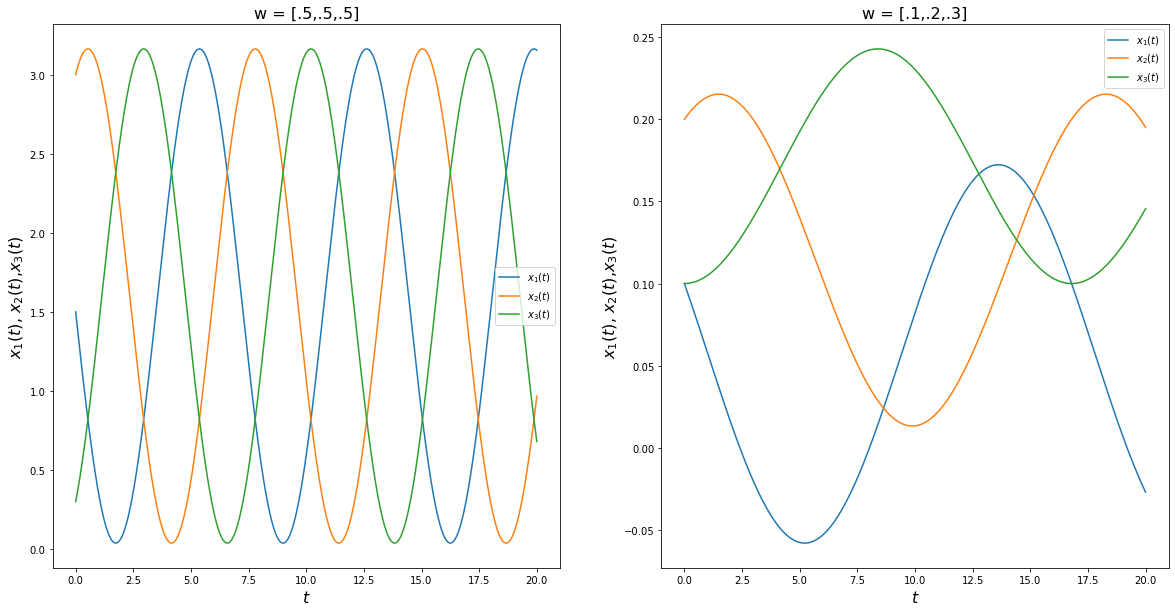

In [13]:
A = sm.Matrix([[0, -w3, w2],[w3, 0, -w1],[-w2, w1, 0]])  # declaring matrix as given in the question.
display(A)

# defining function to accomodate new state space 
def f_vdp5(x,t): 
    w = [.5,.5,.5]
    return [
        -w[2]*x[1] + w[1]*x[2],
        w[2]*x[0] - w[0]*x[2],
        -w[1]*x[0] + w[0]*x[1]
    ]

# Find a trajectory starting at the point (0.1,0.2,0.1)
t = np.linspace(0., 20., 1001)
trajectory5 = spi.odeint(f_vdp5,[1.5,3,.3],t);

# # Plot the three components of x
fig = plt.figure(figsize = (20,10))
fig.add_subplot(121)
plt.plot(t, trajectory5[0:,0],label="$x_1(t)$");
plt.plot(t, trajectory5[0:,1],label="$x_2(t)$");
plt.plot(t, trajectory5[0:,2],label="$x_3(t)$");
plt.xlabel('$t$',size =16);
plt.ylabel('$x_1(t)$, $x_2(t)$,$x_3(t)$',size =16);
plt.legend();
plt.title("w = [.5,.5,.5]",size = 16)

### for different value of w =[0.1,0.2,0.3]
def f_vdp51(x,t): 
    w = [.1,.2,.3]
    return [
        -w[2]*x[1] + w[1]*x[2],
        w[2]*x[0] - w[0]*x[2],
        -w[1]*x[0] + w[0]*x[1]
    ]

# Find a trajectory starting at the point (0.1,0.2,0.1)
t = np.linspace(0., 20., 1001)

trajectory51 = spi.odeint(f_vdp51,[0.1,0.2,.1],t);
# # Plot the three components of x
fig.add_subplot(122)
plt.plot(t, trajectory51[0:,0],label="$x_1(t)$");
plt.plot(t, trajectory51[0:,1],label="$x_2(t)$");
plt.plot(t, trajectory51[0:,2],label="$x_3(t)$");
plt.xlabel('$t$',size =16);
plt.ylabel('$x_1(t)$, $x_2(t)$,$x_3(t)$', size =16);
plt.legend();
plt.title("w = [.1,.2,.3]", size = 16)

Text(0.5, 1.0, 'W = [0.2,0.1,0.3]')

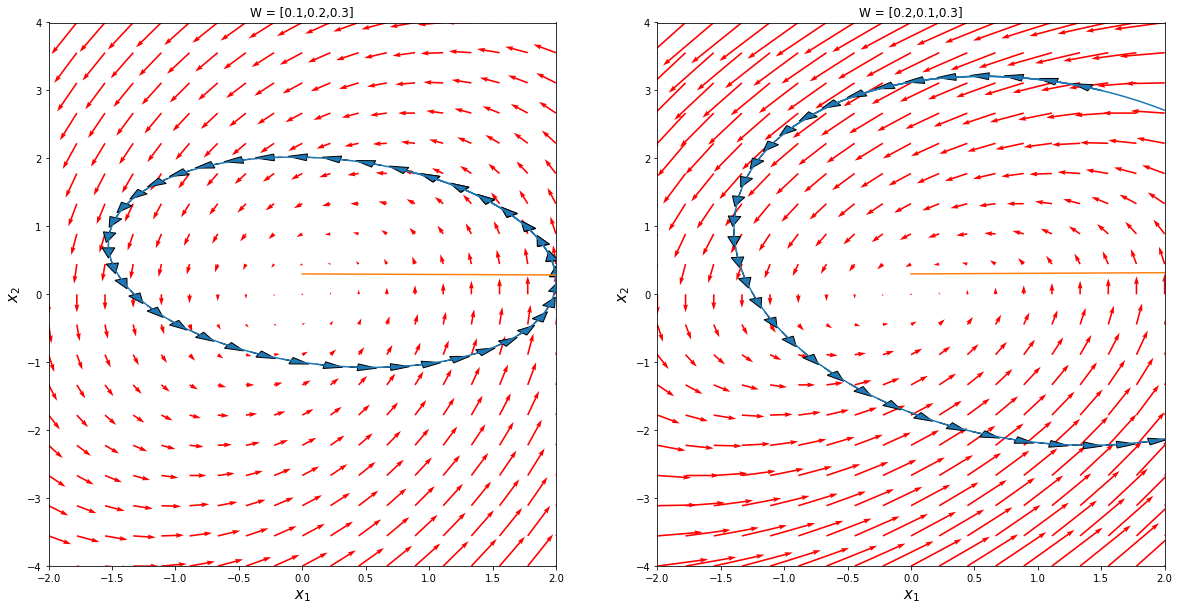

In [14]:
### ploting trajectory in vector space 

### One and only - the function
def f_vdp52(x,t): 
    w = [.1,.2,.3]
    return [
        -w[2]*x[1] + w[1]*x[2],
         w[2]*x[0] - w[0]*x[2],
        -w[1]*x[0] + w[0]*x[1]
    ]

## variable preparation area. 
a1,b1 = (-2,2)
a2,b2 = (-4,4)
x1 = np.linspace(a1, b1, 19)
x2 = np.linspace(a2, b2, 19)
# x3 = np.linspace(a2, b2, 19)
X1,X2 = np.meshgrid(x1,x2)
u,v = np.zeros(X1.shape), np.zeros(X2.shape) 
n,m = X1.shape
for i in range(n):
    for j in range(m):
        xdot = f_vdp52([X1[i,j],X2[i,j],X2[i,j]],0)
        u[i,j] = xdot[0]
        v[i,j] = xdot[1]
        
fig = plt.figure(figsize = (20,10))
fig.add_subplot(121)
# Plot the vector field
Q = plt.quiver(X1, X2, u, v, color='r',scale=2,angles='xy',scale_units='xy')

# Find a trajectory starting at the point (2,.2,0.3)
t = np.linspace(0., 20., 1001)
trajectory52 = spi.odeint(f_vdp52,[2,.2,.3],t);

for i in range(50):
    x = trajectory52[20*i]
    y = 0.1*np.array(f_vdp52(x,0))
    plt.arrow(x[0], x[1], y[0], y[1],head_width=0.1)
    
# Plot the trajectory
plt.plot(trajectory52[0:,0], trajectory52[0:,1],trajectory52[0:,2])
plt.xlabel('$x_1$', size = 15)
plt.ylabel('$x_2$', size = 15)
plt.xlim([a1,b1])
plt.ylim([a2,b2])
plt.title("W = [0.1,0.2,0.3]")

# plt.scatter3d(trajectory[0:,0], trajectory[0:,1],trajectory[0:,2])
### ploting trajectory in vector space 

### One and only - the function
def f_vdp53(x,t): 
    w = [.2,.1,.3]
    return [
        -w[2]*x[1] + w[1]*x[2],
         w[2]*x[0] - w[0]*x[2],
        -w[1]*x[0] + w[0]*x[1]
    ]

## variable preparation area. 
a1,b1 = (-2,2)
a2,b2 = (-4,4)
x1 = np.linspace(a1, b1, 19)
x2 = np.linspace(a2, b2, 19)
# x3 = np.linspace(a2, b2, 19)
X1,X2 = np.meshgrid(x1,x2)
u,v = np.zeros(X1.shape), np.zeros(X2.shape) 
n,m = X1.shape
for i in range(n):
    for j in range(m):
        xdot = f_vdp53([X1[i,j],X2[i,j],X2[i,j]],0)
        u[i,j] = xdot[0]
        v[i,j] = xdot[1]
        

# Plot the vector field
fig.add_subplot(122)
Q = plt.quiver(X1, X2, u, v, color='r',scale=2,angles='xy',scale_units='xy')

# Find a trajectory starting at the point (2,.2,0.3)

t = np.linspace(0., 20., 1001)
trajectory53 = spi.odeint(f_vdp53,[1.5,3,.3],t);

for i in range(50):
    x = trajectory53[15*i]
    y = 0.1*np.array(f_vdp53(x,0))
    plt.arrow(x[0], x[1], y[0], y[1],head_width=0.1)

# Plot the trajectory
plt.plot(trajectory53[0:,0], trajectory53[0:,1],trajectory53[0:,2])
plt.xlabel('$x_1$', size = 15)
plt.ylabel('$x_2$', size = 15)
plt.xlim([a1,b1])
plt.ylim([a2,b2])
plt.title("W = [0.2,0.1,0.3]")

### 6. Analysis of a Bistable Switch

A genetic bistable switch has the model

$$
\dot u = \frac{\alpha_1}{1 + v^2} - u \\
\dot v = \frac{\alpha_2}{1 + u^2} - v 
$$

where $\alpha_1$ and $\alpha_2$ are the expression rates of the two proteins $u$ and $v$. The behavior of this system is that when one protein is high, the other should be low.

a) Show that when $\alpha_1 = \alpha_2 = \frac{17}{4}$, there are two isolated equilibra corresponding to having one protein be high and the other low. Show that these equilibria are unstable. 

**Note**: You might start this problem by plotting the vector field for this system and finding the equilibria graphically.

b) Find values of $\alpha_1$ and $\alpha_2$ for which there is only equilibrium (assuming positive values for $u$ and $v$). Is this equilibrium stable?

___
### Answer to question 6(a)


Region 1 and Region 2 represents the area where equilibrim exist. 
Equilibrium in Region 1 is stable.
Equilibrium in Region 2 is stable.

In the below diagram, red color arrows represent the vectors and blue lines represent the trajectory. 
      



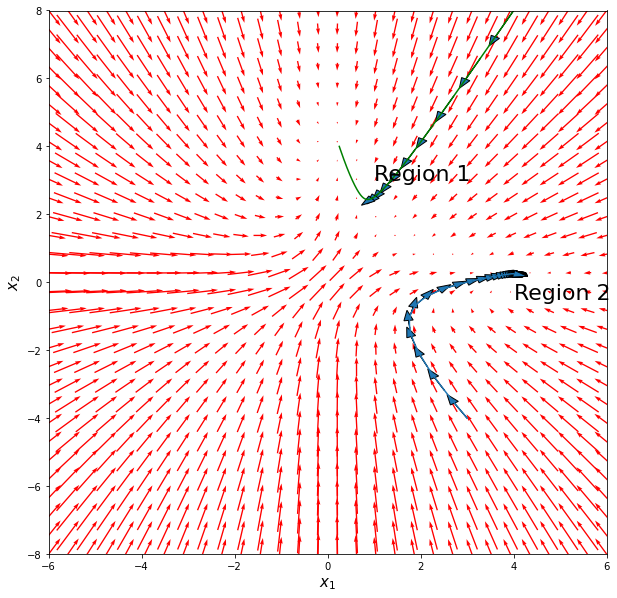

In [15]:
import warnings

def action_with_warnings():
    warnings.warn("should not appear")

a1 = a2 = 17/4        #value of a1 and a2

### declaring function to capture the system of ODEs.
def f_vdp6a(x,t):
    return [
        - x[0] + a1 /(1 + x[1]**2),
        - x[1] + a2 /(1 + x[0]**2)
    ]

## marking the limit of the plot. 
p1,q1 = (-6,6)
p2,q2 = (-8,8)
x1 = np.linspace(p1, q1, 30)
x2 = np.linspace(p2, q2, 30)

X1,X2 = np.meshgrid(x1,x2)    # creating meshgrid

### creating matrix of same size as grid.
u,v = np.zeros(X1.shape), np.zeros(X2.shape) 
n,m = X1.shape

for i in range(n):
    for j in range(m):
        xdot = f_vdp6a([X1[i,j],X2[i,j]],0)
        u[i,j] = xdot[0]                   # saving values, these will be used as input to quiver
        v[i,j] = xdot[1]                   # saving values, these will be used as input to quiver

fig = plt.figure(figsize=(10,10))
Q = plt.quiver(X1, X2, u, v, color='r' ,scale=10,scale_units='xy',pivot='mid')

"""
finding first trajectory at (3,-4) by solving the ODE.
This trajectory is highly unstable and leads to some runtime warnings. 
The trajectory plot reveal the diflection cause by fields.
"""
t = np.linspace(0., 20, 1001)
trajectory6a = spi.odeint(f_vdp6a,[3,-4],t);

for i in range(100):
    x = trajectory6a[10*i]
    y = 0.1*np.array(f_vdp6a(x,0))
    plt.arrow(x[0], x[1], y[0], y[1],head_width=0.2)
    
plt.plot(trajectory6a[0:,0], trajectory6a[0:,1])       #plotting trajectory 1 starting from (3,-4)

## Finding second trajectory at (4,8).
t = np.linspace(0., 20, 1001)
trajectory6a1 = spi.odeint(f_vdp6a,[4,8],t);

for i in range(10):
    x = trajectory6a1[10*i]
    y = 0.1*np.array(f_vdp6a(x,0))
    plt.arrow(x[0], x[1], y[0], y[1],head_width=0.2)
    
plt.plot(trajectory6a1[0:,0], trajectory6a1[0:,1], color = 'g');#plotting trajectory 1 starting from (4,8)

# ## Finding Third trajectory.
# t = np.linspace(0., 20, 1001)
# trajectory6a1 = spi.odeint(f_vdp6a,[-3,-6],t);

# for i in range(100):
#     x = trajectory6a1[10*i]
#     y = 0.1*np.array(f_vdp6a(x,0))
#     plt.arrow(x[0], x[1], y[0], y[1],head_width=0.2)
    
# plt.plot(trajectory6a1[0:,0], trajectory6a1[0:,1], color = 'g');

####### Plotting Department 
plt.xlim([p1,q1])
plt.ylim([p2,q2])
plt.text(1, 3, 'Region 1', fontsize = 22)
plt.text(4, -0.5, 'Region 2', fontsize = 22)
plt.xlabel('$x_1$', size = 15)
plt.ylabel('$x_2$', size = 15)

print('\033[1m'
"""
Region 1 and Region 2 represents the area where equilibrim exist. 
Equilibrium in Region 1 is stable.
Equilibrium in Region 2 is stable.

In the below diagram, red color arrows represent the vectors and blue lines represent the trajectory. 
      \n""")

___
### Answer to question 6(b)

 
Below plot represents the vectors and trajectory for a1 = 0.1 and a2 = 0.1.
Yes, this equilibrium is stable as all the vectors are converging at the point of equilibrium. 



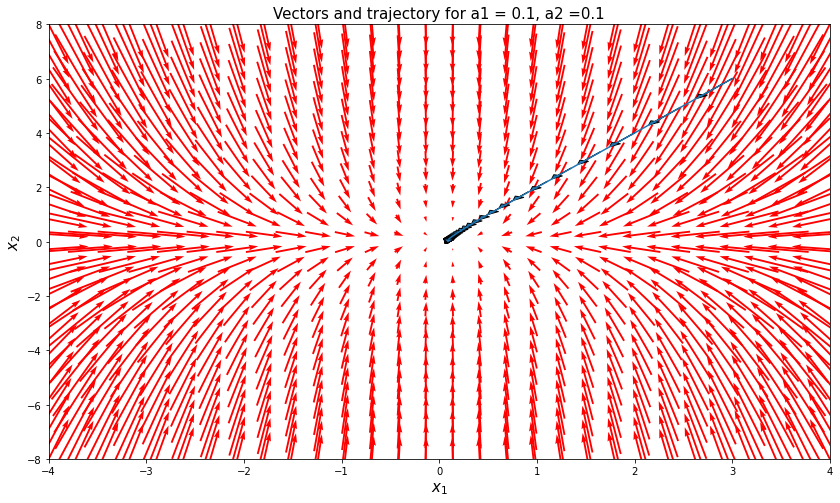

In [16]:
a1 = 0.1        #value of a2
a2 = 0.1       #value of a2

### declaring function to capture the system of ODEs.
def f_vdp6b(x,t):
    return [
        - x[0] + a1 /(1 + x[1]**2),
        - x[1] + a2 /(1 + x[0]**2)
    ]

## marking the limit of the plot. 
p1,q1 = (-4,4)
p2,q2 = (-8,8)
x1 = np.linspace(p1, q1, 30)
x2 = np.linspace(p2, q2, 30)

X1,X2 = np.meshgrid(x1,x2)    # creating meshgrid

### creating matrix of same size as grid.
u,v = np.zeros(X1.shape), np.zeros(X2.shape) 
n,m = X1.shape

for i in range(n):
    for j in range(m):
        xdot = f_vdp6b([X1[i,j],X2[i,j]],0)
        u[i,j] = xdot[0]                   # saving values, these will be used as input to quiver
        v[i,j] = xdot[1]                   # saving values, these will be used as input to quiver

### creating the quiver 
fig = plt.figure(figsize = (14,8))
Q = plt.quiver(X1, X2, u, v, color='r' ,scale=5,scale_units='xy',pivot='mid')

t = np.linspace(0., 20, 1001)
trajectory6b = spi.odeint(f_vdp6b,[3,6],t);

# adding arrow to the trajectory at regular interval
for i in range(100):
    x = trajectory6b[10*i]
    y = 0.1*np.array(f_vdp6b(x,0))
    plt.arrow(x[0], x[1], y[0], y[1],head_width=0.1)

## the ploting department
plt.plot(trajectory6b[0:,0], trajectory6b[0:,1]);
plt.xlim([p1,q1])
plt.ylim([p2,q2])
plt.xlabel('$x_1$', size = 15)
plt.ylabel('$x_2$', size = 15)
plt.title("Vectors and trajectory for a1 = 0.1, a2 =0.1", size = 15)
print(
""" 
Below plot represents the vectors and trajectory for a1 = 0.1 and a2 = 0.1.
Yes, this equilibrium is stable as all the vectors are converging at the point of equilibrium. 
""")

### 7. Simulation 

Using simulation and visualization, explain the behavior of the system

\begin{eqnarray}
\dot x & = & -y - z \\
\dot y & = & x + a y \\
\dot z & = & b + z(x-c)
\end{eqnarray}

where $a=0.2$, $b=0.2$ and $c=5.7$. 

___
### Answer to Question 7

 
After looking at the trajectory of the system, it is spiralling outwards. 



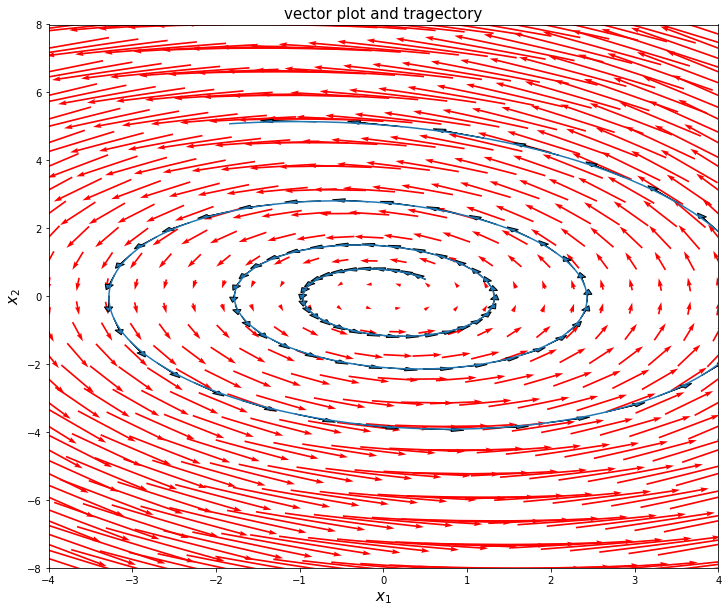

In [17]:
a = 0.2
b = 0.2
c = 5.7

# function declartion to capture the system of ODEs. 
def simul(x,t):
    return[
        -x[1] - x[2],
        x[0] + a*x[1],
        b + x[2]*(x[0] - c)
    ]

## marking the limit of the plot. 
p1,q1 = (-4,4)
p2,q2 = (-8,8)
p3,q3 = (-4,4)
n = 24
x1 = np.linspace(p1, q1, n)
x2 = np.linspace(p2, q2, n)
x3 = np.linspace(p3, q3, n)

X1,X2 = np.meshgrid(x1,x2)    # creating meshgrid

### creating matrix of same size as grid to save the values.
u,v = np.zeros(X1.shape), np.zeros(X2.shape) 
n,m = X1.shape

for i in range(n):
    for j in range(m):
        xdot = simul([X1[i,j],X2[i,j],X2[i,j]],0)
        u[i,j] = xdot[0]                   # saving values, these will be used as input to quiver
        v[i,j] = xdot[1]                   # saving values, these will be used as input to quiver

# ploting the quiver 
fig = plt.figure(figsize = (12,10))
Q = plt.quiver(X1, X2, u, v, color='r' ,scale=10,scale_units='xy',pivot='mid')

### claculating trajectory
trajectory7 = spi.odeint(simul,[.5,.5,0],t);

### adding arrow to trajectory at regular interval
for i in range(100):
    x = trajectory7[10*i]
    y = 0.1*np.array(simul(x,0))
    plt.arrow(x[0], x[1], y[0], y[1],head_width=0.1)
    
### the graph plotting department.
plt.plot(trajectory7[0:,0], trajectory7[0:,1]);
plt.xlim([p1,q1])
plt.ylim([p2,q2])
plt.xlabel('$x_1$', size = 15)
plt.ylabel('$x_2$', size = 15)
plt.title("vector plot and tragectory", size = 15)

print(
""" 
After looking at the trajectory of the system, it is spiralling outwards. 
""")

Text(0.5, 1.0, 'Tragectory with respect to time')

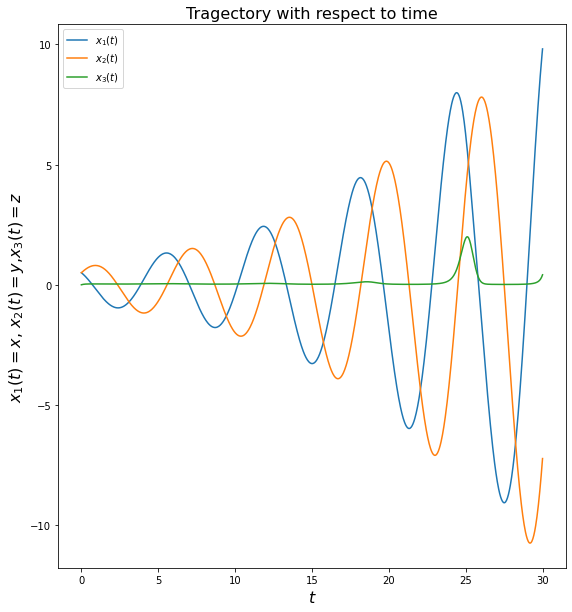

In [18]:
# Find a trajectory starting at the point (0.1,0.1,0.1)
t = np.linspace(0., 30., 1001)

trajectory71 = spi.odeint(simul,[.5,.5,0],t);
# # Plot the three components of x
fig = plt.figure(figsize = (20,10))
fig.add_subplot(122)
plt.plot(t, trajectory71[0:,0],label="$x_1(t)$");
plt.plot(t, trajectory71[0:,1],label="$x_2(t)$");
plt.plot(t, trajectory71[0:,2],label="$x_3(t)$");
plt.xlabel('$t$',size =16);
plt.ylabel('$x_1(t) = x $, $x_2(t) = y$,$x_3(t) = z$', size =16);
plt.legend();
plt.title("Tragectory with respect to time", size = 16)